# Feedforward Neural Networks — Training and Evaluating the Model on Forex Data
a medium.com article

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
# from tensorflow.keras.models import Sequential
from keras.src.models import Sequential
# from tensorflow.keras.layers import Dense
from keras.src.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# Load the forex data
data = pd.read_csv("DTWEXB.csv", index_col='observation_date', parse_dates=True)
data = data.dropna()

In [5]:
# Remove rows with '.' and convert the column to float
data = data[data.DTWEXB != '.']
data['DTWEXB'] = data['DTWEXB'].astype(float)

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create lagged feature
X = data_scaled[:-1]
y = data_scaled[1:]

# Split the data into training and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [6]:
# Create the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(1,)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

/home/saeed/repozitories/machine-learning/tensorflow-course/start-tensorflow/envs/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Make predictions on the test
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error: {mse}')

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Mean Squared Error: 0.14339776614705427


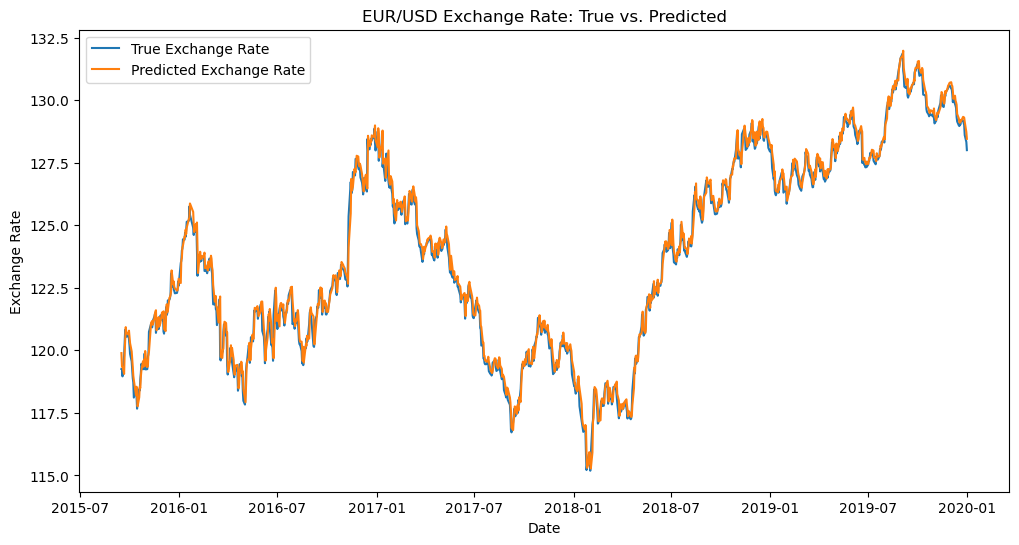

In [8]:
import matplotlib.pyplot as plt

# Plot the true and predicted exchange rates
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size+1:], y_test_inv, label='True Exchange Rate')
plt.plot(data.index[train_size+1:], y_pred_inv, label='Predicted Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('EUR/USD Exchange Rate: True vs. Predicted')
plt.legend()
plt.show()